## Load Data

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import xarray as xr
import rioxarray as rxr
from odc.geo.xr import ODCExtensionDa
from odc.geo.geobox import GeoBox
from odc.geo.geom import Geometry
import matplotlib.pyplot as plt
import pyproj

In [2]:
mines = pd.read_stata("/scicore/home/meiera/schulz0022/projects/growth-and-temperature/data_nobackup/mines/raw/20150774_data/Data/BCRT_baseline.dta")
mines


,gid,cell,latitude,longitude,year,iso_1,country_nb,it,acled,acled_around,...,yeard5,yeard6,yeard7,yeard8,yeard9,yeard10,yeard11,yeard12,yeard13,yeard14
0,79600,1,-34.75,19.75,1997,ZAF,53,888,0,0,...,0,0,0,0,0,0,0,0,0,0
1,79600,1,-34.75,19.75,1998,ZAF,53,889,0,0,...,0,0,0,0,0,0,0,0,0,0
2,79600,1,-34.75,19.75,1999,ZAF,53,890,0,1,...,0,0,0,0,0,0,0,0,0,0
3,79600,1,-34.75,19.75,2000,ZAF,53,891,0,2,...,0,0,0,0,0,0,0,0,0,0
4,79600,1,-34.75,19.75,2001,ZAF,53,892,0,2,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144685,183261,10435,37.25,10.25,2006,TUN,50,846,0,1,...,0,0,0,0,0,1,0,0,0,0
144686,183261,10435,37.25,10.25,2007,TUN,50,847,0,1,...,0,0,0,0,0,0,1,0,0,0
144687,183261,10435,37.25,10.25,2008,TUN,50,848,0,0,...,0,0,0,0,0,0,0,1,0,0
144688,183261,10435,37.25,10.25,2009,TUN,50,849,0,1,...,0,0,0,0,0,0,0,0,1,0


In [3]:
iso_1_id_dict = pd.Series(mines.iso_1.unique()).reset_index(name="iso_1").set_index("iso_1").iloc[:,0].to_dict()
mines["iso_1_id"] = mines.iso_1.map(iso_1_id_dict)

In [9]:
iso_1_id_dict

{'ZAF': 0,
 'LSO': 1,
 'NAM': 2,
 'SWZ': 3,
 'BWA': 4,
 'MOZ': 5,
 'MDG': 6,
 'ZWE': 7,
 'MUS': 8,
 'AGO': 9,
 'ZMB': 10,
 'MWI': 11,
 'COD': 12,
 'COM': 13,
 'TZA': 14,
 'COG': 15,
 'KEN': 16,
 'BDI': 17,
 'GAB': 18,
 'RWA': 19,
 'UGA': 20,
 'SOM': 21,
 'STP': 22,
 'GNQ': 23,
 'CMR': 24,
 'CAF': 25,
 'SDN': 26,
 'ETH': 27,
 'LBR': 28,
 'NGA': 29,
 'CIV': 30,
 'GHA': 31,
 'TGO': 32,
 'BEN': 33,
 'SLE': 34,
 'GIN': 35,
 'TCD': 36,
 'BFA': 37,
 'MLI': 38,
 'GNB': 39,
 'DJI': 40,
 'SEN': 41,
 'NER': 42,
 'ERI': 43,
 'GMB': 44,
 'CPV': 45,
 'MRT': 46,
 'DZA': 47,
 'LBY': 48,
 'EGY': 49,
 'MAR': 50,
 'TUN': 51}

In [4]:
variables = ["iso_1_id", "nb_mines_a", "nb_diamond", "mainmineral"]

In [8]:
mines["iso_1_id"].max()

51

In [5]:
mines.set_index(["latitude", "longitude", "year"])[variables]

iso_1_id  nb_mines_a  nb_diamond mainmineral
latitude longitude year                                              
-34.75   19.75     1997         0         0.0           0            
                   1998         0         0.0           0            
                   1999         0         0.0           0            
                   2000         0         0.0           0            
                   2001         0         0.0           0            
...                           ...         ...         ...         ...
 37.25   10.25     2006        51         0.0           0            
                   2007        51         0.0           0            
                   2008        51         0.0           0            
                   2009        51         0.0           0            
                   2010        51         0.0           0            

[144690 rows x 4 columns]

In [ ]:
# https://www.openicpsr.org/openicpsr/project/113068/version/V1/view?path=/openicpsr/113068/fcr:versions/V1/20150774_data/Data/BCRT_baseline.dta&type=file
mines_ds = xr.Dataset.from_dataframe(mines.set_index(["latitude", "longitude", "year"])[variables])
mines_ds = mines_ds.rio.write_crs(4326)
mines_ds

<xarray.Dataset> Size: 8MB
Dimensions:      (latitude: 145, longitude: 145, year: 14)
Coordinates:
  * latitude     (latitude) float32 580B -34.75 -34.25 -33.75 ... 36.75 37.25
  * longitude    (longitude) float32 580B -25.25 -24.25 -23.75 ... 57.25 57.75
  * year         (year) int16 28B 1997 1998 1999 2000 ... 2007 2008 2009 2010
    spatial_ref  int64 8B 0
Data variables:
    iso_1_id     (latitude, longitude, year) float64 2MB nan nan nan ... nan nan
    nb_mines_a   (latitude, longitude, year) float64 2MB nan nan nan ... nan nan
    nb_diamond   (latitude, longitude, year) float32 1MB nan nan nan ... nan nan
    mainmineral  (latitude, longitude, year) object 2MB nan nan nan ... nan nan

---
## Test Grid Alignment

The table contains coordinates. Let check whether they identify the top-left coordinate of the grid cells, which is standard.

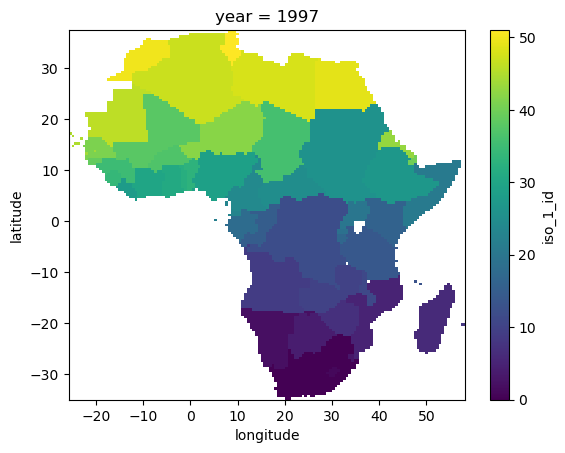

In [6]:
mines_ds.iso_1_id.isel(year=0).plot.imshow()

In [7]:
countries = gpd.read_file("/scicore/home/meiera/schulz0022/projects/growth-and-temperature/data_nobackup/misc/processed/stage_1/gadm/gadm_levelADM_0_simplified.gpkg")

<Axes: title={'center': 'year = 1997'}, xlabel='longitude', ylabel='latitude'>

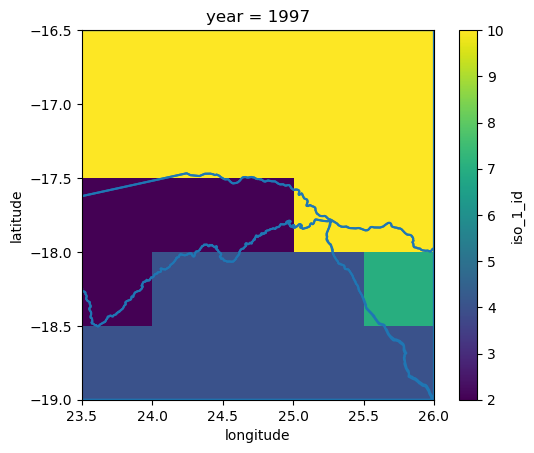

In [8]:
fix, ax = plt.subplots()
mines_ds.iso_1_id.sel(latitude = slice(-19, -16.5), longitude = slice(23.5, 26)).isel(year=0).plot.imshow(ax = ax)
countries.clip((23.5, -19, 26, -16.5)).exterior.plot(ax=ax, color=None)

The grid is indeed correctly identified by the top-left corner.

---

## Test Variables

In [1]:
import xarray as xr
mines_ds = xr.open_zarr("/scicore/home/meiera/schulz0022/projects/growth-and-temperature/data_nobackup/berman_mining/processed/stage_2/berman_mining_timeseries_reprojected.zarr")

/scratch/ipykernel_862022/2318949799.py:2: RuntimeWarning: Failed to open Zarr store with consolidated metadata, but successfully read with non-consolidated metadata. This is typically much slower for opening a dataset. To silence this warning, consider:
1. Consolidating metadata in this existing store with zarr.consolidate_metadata().
2. Explicitly setting consolidated=False, to avoid trying to read consolidate metadata, or
3. Explicitly setting consolidated=True, to raise an error in this case instead of falling back to try reading non-consolidated metadata.
  mines_ds = xr.open_zarr("/scicore/home/meiera/schulz0022/projects/growth-and-temperature/data_nobackup/berman_mining/processed/stage_2/berman_mining_timeseries_reprojected.zarr")


In [2]:
mines_ds

<xarray.Dataset> Size: 325GB
Dimensions:     (band: 1, latitude: 33601, longitude: 86401, time: 14)
Coordinates:
  * latitude    (latitude) float64 269kB 75.0 75.0 74.99 ... -64.99 -65.0 -65.0
  * band        (band) int64 8B 1
  * time        (time) datetime64[ns] 112B 1997-12-31 1998-12-31 ... 2010-12-31
  * longitude   (longitude) float64 691kB -180.0 -180.0 -180.0 ... 180.0 180.0
Data variables:
    nb_diamond  (band, latitude, longitude, time) float32 163GB dask.array<chunksize=(1, 512, 512, 1), meta=np.ndarray>
    nb_mines_a  (band, latitude, longitude, time) float32 163GB dask.array<chunksize=(1, 512, 512, 1), meta=np.ndarray>

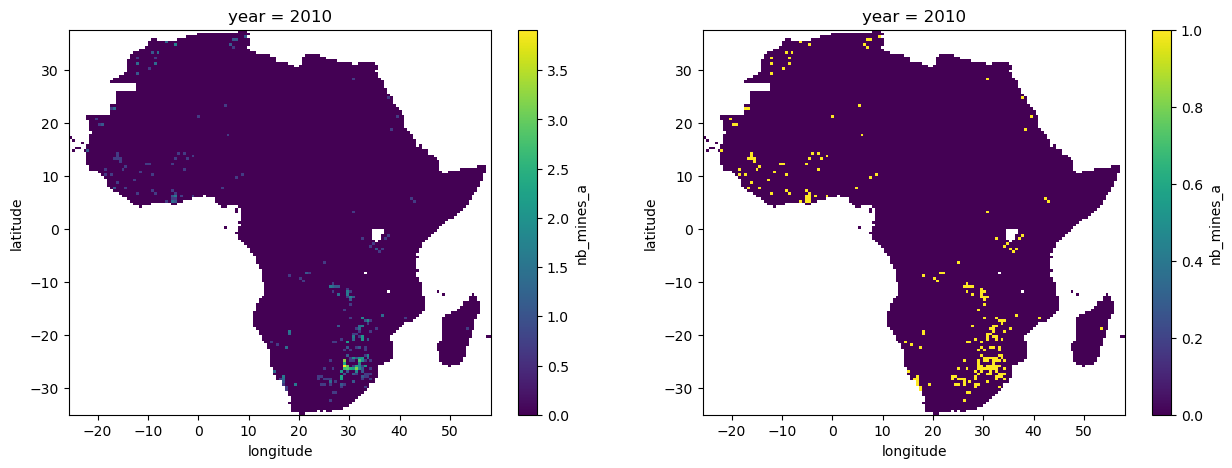

In [9]:
fix, ax = plt.subplots(1, 2, figsize=(15,5))

np.log(mines_ds.nb_mines_a + 1).isel(year=-1).plot.imshow(ax=ax[0])
(mines_ds.nb_mines_a > 0).where(~mines_ds.nb_mines_a.isnull()).isel(year=-1).plot.imshow(ax=ax[1])

/scicore/home/meiera/schulz0022/miniforge-pypy3/envs/gnt/lib/python3.11/site-packages/xarray/computation/apply_ufunc.py:818: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)
/scicore/home/meiera/schulz0022/miniforge-pypy3/envs/gnt/lib/python3.11/site-packages/xarray/computation/apply_ufunc.py:818: RuntimeWarning: invalid value encountered in log
  result_data = func(*input_data)


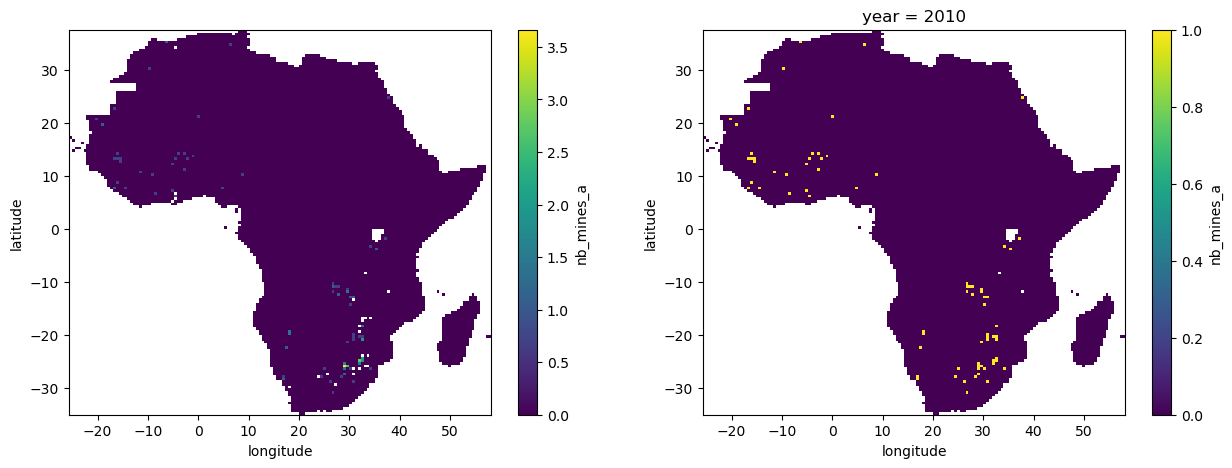

In [25]:
fix, ax = plt.subplots(1, 2, figsize=(15,5))
np.log(mines_ds.nb_mines_a.sel(year=2010) - mines_ds.nb_mines_a.sel(year=2000) + 1).plot.imshow(ax=ax[0])
any_mine_diff = ((mines_ds.nb_mines_a.sel(year=2010) - mines_ds.nb_mines_a.sel(year=2000)) > 0)
any_mine_diff.where(~mines_ds.nb_mines_a.sel(year=2010).isnull()).plot.imshow(ax=ax[1])

In [10]:
ntl_harm = xr.open_zarr("/scicore/home/meiera/schulz0022/projects/growth-and-temperature/data_nobackup/ntl_harm/harmonized/processed/stage_2/ntl_harm_timeseries_reprojected.zarr", consolidated=False, chunks="auto").ntl_harm
ntl_harm = ntl_harm.odc.assign_crs(4326)

In [8]:
geobox = GeoBox(
    shape = mines_ds.odc.geobox.shape,
    crs = 4326,
    affine = mines_ds.rio.transform()
)

In [ ]:
ntl_harm_reproj = ntl_harm.sel(time=slice("2000-12-31", "2010-12-31")).odc.reproject(geobox, resampling = "average").compute()

ntl_harm_reproj = ntl_harm_reproj.rename({"time": "year"}).assign_coords(year=("year", ntl_harm_reproj.time.to_pandas().dt.year))

ntl_harm_reproj["longitude"] = mines_ds.longitude

ntl_harm_reproj = ntl_harm_reproj.rename("ntl_harm")

In [79]:
merged = xr.merge([mines_ds, ntl_harm_reproj], compat="override", join="inner")

In [78]:
merged.isel(band=0, year=0).ntl_harm

<xarray.DataArray 'ntl_harm' (latitude: 145, longitude: 145)> Size: 168kB
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], shape=(145, 145))
Coordinates:
  * latitude     (latitude) float32 580B -34.75 -34.25 -33.75 ... 36.75 37.25
  * longitude    (longitude) float32 580B -25.25 -24.25 -23.75 ... 57.25 57.75
    year         int32 4B 1997
    spatial_ref  int64 8B 0
    band         int64 8B 1
Attributes:
    nodata:      65535
    _FillValue:  65535

In [82]:
xr.corr(
    (merged.isel(band=0, year=-1).ntl_harm - merged.isel(band=0, year=0).ntl_harm), 
    (merged.isel(band=0, year=-1).nb_mines_a - merged.isel(band=0, year=0).nb_mines_a)
    )

<xarray.DataArray ()> Size: 8B
array(0.01322225)
Coordinates:
    spatial_ref  int64 8B 0
    band         int64 8B 1